# Extraction, Analyse et Visualisation des données d'un site de E-commerce : cas de https://books.toscrape.com/

# 1 - Extraction des donnees

#### Importation des differentes bibliotheque pour examiner notre site

In [1]:
# Importation des differentes bibliotheque pour examiner notre site 
from bs4 import BeautifulSoup as bs 
import requests as rq
import pandas as pd
from words2num import words2num 
from urllib.parse import urljoin

#### Extraction  des categories

In [8]:
url_cat = "https://books.toscrape.com/"
response = rq.get(url_cat)
soup = bs(response.text, "html.parser")

In [10]:
# on recupere la div qui a la class side_categories
aside = soup.find('div', class_='side_categories')
categories_div = aside.find('ul').find('li').find('ul')
categories =[category.text.strip() for category in categories_div.children if category.name]
#categories


#### Extraction des produits

In [11]:
# recuperation et visualisation du code html avec request et beautiful soup
url = "https://books.toscrape.com/index.html"
r = rq.get (url)
soup = bs(r.text, "html.parser")


In [12]:
# recuperer de toutes les pages du site 
def categories_books ():
    url_product=[]
    for i in range(1,51):
        url_product.append(f"https://books.toscrape.com/catalogue/page-{i}.html")
    return url_product
categories_books()

['https://books.toscrape.com/catalogue/page-1.html',
 'https://books.toscrape.com/catalogue/page-2.html',
 'https://books.toscrape.com/catalogue/page-3.html',
 'https://books.toscrape.com/catalogue/page-4.html',
 'https://books.toscrape.com/catalogue/page-5.html',
 'https://books.toscrape.com/catalogue/page-6.html',
 'https://books.toscrape.com/catalogue/page-7.html',
 'https://books.toscrape.com/catalogue/page-8.html',
 'https://books.toscrape.com/catalogue/page-9.html',
 'https://books.toscrape.com/catalogue/page-10.html',
 'https://books.toscrape.com/catalogue/page-11.html',
 'https://books.toscrape.com/catalogue/page-12.html',
 'https://books.toscrape.com/catalogue/page-13.html',
 'https://books.toscrape.com/catalogue/page-14.html',
 'https://books.toscrape.com/catalogue/page-15.html',
 'https://books.toscrape.com/catalogue/page-16.html',
 'https://books.toscrape.com/catalogue/page-17.html',
 'https://books.toscrape.com/catalogue/page-18.html',
 'https://books.toscrape.com/catalogu

#### Extraction des liens menant vers le details de chaque produit

In [13]:
# recuperer les liens du details des differents produits
def liens_articles():
    links = []
    base_url = 'https://books.toscrape.com/catalogue/'
     # Générer les URLs des pages de catégories
    categories_books = [f'https://books.toscrape.com/catalogue/page-{i}.html' for i in range(1, 51)]  
   

    for url in categories_books:
        r = rq.get(url)
        soup = bs(r.text, "html.parser")
        articles = soup.find_all('article', class_="product_pod")
        for article in articles:
            liens = article.find('h3').find("a")['href']
            liens_final = urljoin(base_url, liens)  # Utiliser l'URL de base pour créer le lien final
            links.append(liens_final)
    # Supprimer les doublons en convertissant la liste en un ensemble puis en reconvertissant en liste
    unique_links = list(set(links))
    return unique_links
      
liens_articles ()       


['https://books.toscrape.com/catalogue/el-deafo_691/index.html',
 'https://books.toscrape.com/catalogue/daily-fantasy-sports_683/index.html',
 'https://books.toscrape.com/catalogue/the-thing-about-jellyfish_283/index.html',
 'https://books.toscrape.com/catalogue/burning_884/index.html',
 'https://books.toscrape.com/catalogue/the-story-of-art_500/index.html',
 'https://books.toscrape.com/catalogue/deep-under-walker-security-1_15/index.html',
 'https://books.toscrape.com/catalogue/alice-in-wonderland-alices-adventures-in-wonderland-1_5/index.html',
 'https://books.toscrape.com/catalogue/sarahs-key_217/index.html',
 'https://books.toscrape.com/catalogue/the-bhagavad-gita_60/index.html',
 'https://books.toscrape.com/catalogue/lean-in-women-work-and-the-will-to-lead_183/index.html',
 'https://books.toscrape.com/catalogue/every-heart-a-doorway-every-heart-a-doorway-1_465/index.html',
 'https://books.toscrape.com/catalogue/the-grownup_546/index.html',
 'https://books.toscrape.com/catalogue/gl

In [74]:
print(len(liens_articles ()))

1000


#### Fonction qui  recuperer la quantite dans la chaine de caractere des stock

In [14]:
# recuperer la quantite dans la chaine de caractere des stocks
def nb_stocks(stock):
    d = stock.split() 
    dispo_stock = 0
    for i,index in enumerate(d):
        if i == 2:
            dispo_stock = index
            break
    return dispo_stock


#### Fonction qui recupere les informations de chaque prduit

In [15]:
# recuperer les infos de chaque produit
products = []
def info_data ():
    pages = liens_articles()
#     pages = ['https://books.toscrape.com/catalogue/the-perfect-play-play-by-play-1_352/index.html']

    for url in pages:
      
        r = rq.get (url)
        soup = bs(r.text, "html.parser")
        try :
            nom_pro = soup.find('article', class_= 'product_page').find('div', class_= 'product_main').find('h1').text
        except AttributeError as e :
            nom_pro = ""
        try :
            price_HT = soup.find('table', class_= 'table table-striped').find_all('tr')[2].find('td').text.replace('Â£','')
        except AttributeError as e :
            price_HT =""
    
        try :
            price_TI = soup.find('table', class_= 'table table-striped').find_all('tr')[3].find('td').text.replace('Â£','')
        except AttributeError as e :
            price_TI =""
    
        try :
             Tax = soup.find('table', class_= 'table table-striped').find_all('tr')[4].find('td').text.replace('Â£','')
        except AttributeError as e :
               Tax ="" 
        try :
             disponibilite_stock = soup.find('table', class_= 'table table-striped').find_all('tr')[5].find('td').text.replace('(','').replace(')','')
             stock = nb_stocks(stock=disponibilite_stock)
        except AttributeError as e :
            stock = ""
    
        try :
            rating = words2num(soup.find('article', class_= 'product_page').find('div', class_= 'product_main').find('p', class_= "star-rating")["class"][1])
        except AttributeError as e :
            rating = ""
        try :
            list_items = soup.find('ul', class_ = 'breadcrumb').find_all('li')
            category_name = list_items[2].text.strip()
#             for categorie_name in categories_name[2:3]:
#                 category_name = categorie_name.find('a').text
                
        except AttributeError as e :
            category_name = ''
            
        products.append({'product_name':nom_pro, 'price_HT':price_HT, 'price_TTC':price_TI, 'tax':Tax, 'stock':stock, 'rating':rating, 'category_name':category_name})
       
    return products
        
prod =info_data() 
print(prod)
print(len(prod))

ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'Une connexion établie a été abandonnée par un logiciel de votre ordinateur hôte', None, 10053, None))

In [ ]:
import pandas as pd
df = pd.DataFrame(prod)
df.head()

#### Importation de mySql

In [2]:
#importation des libriaries sql
import mysql.connector as sql

In [3]:
#connection a la base de donnnee 
try:
    mysql = sql.connect(
        host = "localhost",
        user = "root",
        password = "root",
        database = "brief_2"
    )
       
    print(mysql)

except connector.Error as e:
    print(e)

In [4]:
# creation de la database
mysql_cmd = mysql.cursor()
#mysql_cmd.execute('CREATE DATABASE brief')

In [27]:
#creation de la table categories
#mysql_cmd.execute('CREATE TABLE categories(id INT AUTO_INCREMENT PRIMARY KEY,category_name VARCHAR(255))')

In [81]:
#creation de la table products
mysql_cmd.execute('CREATE TABLE Products (id INT AUTO_INCREMENT PRIMARY KEY,product_name VARCHAR(255) NOT NULL,price_HT DECIMAL(10, 2) NOT NULL,price_TTC DECIMAL(10, 2) NOT NULL,tax DECIMAL(10, 2) NOT NULL,stock INT NOT NULL,rating INT NOT NULL,category_id INT,FOREIGN KEY (category_id) REFERENCES categories(id))');

#### Fonction pour inserer les categories

In [18]:
#importation des libriaries sql
import mysql.connector as sql

# Connection to the database
conn = sql.connect(
        host="localhost",  
        user="root",  
        password="root",  
        database="brief_2",  
    )

def insert_data_categories(datas):
    mysql_cmd = conn.cursor()

    for data in datas:
        sql = "INSERT INTO categories (category_name) VALUES (%s)"
        values = (data,)  
        mysql_cmd.execute(sql, values)
    conn.commit()
    conn.close()

#### Fonction pour inserer les products

In [ ]:
# Connection to the database
conn = sql.connect(
        host="localhost",  
        user="root",  
        password="root",  
        database="brief_2",  
    )
# fonction pour insérer chaque élément de la liste dans la base de données
def insert_data_products(datas):
    mysql_cmd = conn.cursor()
    for data in datas:
        product_name = data["product_name"]
        price_HT = data["price_HT"]
        price_TTC = data["price_TTC"]
        tax = data["tax"]
        stock = data["stock"]
        rating = data["rating"]
        category_name = data["category_name"]
        
        sql = "SELECT id FROM categories WHERE category_name = %s"  
        values = (category_name,)  
        mysql_cmd.execute(sql, values)
        
        
        result = mysql_cmd.fetchone()
        category_id = result[0]
      
        # Requête d'insertion
        sql = "INSERT INTO products (product_name, price_HT, price_TTC,tax,stock,rating,category_id) VALUES (%s, %s, %s,%s, %s, %s,%s)"
        values = (product_name, price_HT, price_TTC,tax,stock,rating,category_id)

        # Exécution de la requête
        mysql_cmd.execute(sql, values)

        # Validation des changements et fermeture de la connexion
    conn.commit()
    conn.close()

####  Insertion des categories et produits en base de donnee

In [84]:
categories = list(categories)
# print(categories)
#insert_data_categories(datas=categories)

In [85]:
#insert_data_products(datas=prod)

#### Extrait les donnees dans la database

In [5]:
# recuperer les products
# Connection to the database
conn = sql.connect(
        host="localhost",  
        user="root",  
        password="root",  
        database="brief_2",  
    )

mysql_con = conn.cursor()
#mysql_con.execute('SELECT * FROM products ')
mysql_con.execute('SELECT products.*, categories.category_name FROM products INNER JOIN categories ON products.category_id = categories.id;')
all_prod = mysql_con.fetchall()
print( all_prod)
#conn.commit()

[(20, 'Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel', Decimal('36.94'), Decimal('36.94'), Decimal('0.00'), 8, 2, 101, 'Travel'), (213, '1,000 Places to See Before You Die', Decimal('26.08'), Decimal('26.08'), Decimal('0.00'), 1, 5, 101, 'Travel'), (289, 'The Great Railway Bazaar', Decimal('30.54'), Decimal('30.54'), Decimal('0.00'), 6, 1, 101, 'Travel'), (430, "It's Only the Himalayas", Decimal('45.17'), Decimal('45.17'), Decimal('0.00'), 19, 2, 101, 'Travel'), (566, 'A Summer In Europe', Decimal('44.34'), Decimal('44.34'), Decimal('0.00'), 7, 2, 101, 'Travel'), (625, 'See America: A Celebration of Our National Parks & Treasured Sites', Decimal('48.87'), Decimal('48.87'), Decimal('0.00'), 14, 3, 101, 'Travel'), (644, 'Neither Here nor There: Travels in Europe', Decimal('38.95'), Decimal('38.95'), Decimal('0.00'), 3, 3, 101, 'Travel'), (730, 'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond', Decimal('49.43'), Decimal('49.43'), Decimal('0.0

#### Transformation des donnees recuperees en DataFrame

In [6]:
datas = pd.DataFrame(all_prod)
datas

,0,1,2,3,4,5,6,7,8
0,20,Vagabonding: An Uncommon Guide to the Art of L...,36.94,36.94,0.00,8,2,101,Travel
1,213,"1,000 Places to See Before You Die",26.08,26.08,0.00,1,5,101,Travel
2,289,The Great Railway Bazaar,30.54,30.54,0.00,6,1,101,Travel
3,430,It's Only the Himalayas,45.17,45.17,0.00,19,2,101,Travel
4,566,A Summer In Europe,44.34,44.34,0.00,7,2,101,Travel
...,...,...,...,...,...,...,...,...,...
995,887,Libertarianism for Beginners,51.33,51.33,0.00,19,2,147,Politics
996,918,Equal Is Unfair: America's Misguided Fight Aga...,56.86,56.86,0.00,12,1,147,Politics
997,657,Amid the Chaos,36.58,36.58,0.00,15,1,148,Cultural
998,792,Dark Notes,19.19,19.19,0.00,15,5,149,Erotica


#### Changement des labels entetes des colonnes

In [7]:
datas = datas.rename(columns={
    0: "id",
    1: "product_name",
    2: "price_HT",
    3: "price_TTC",
    4: "tax(%)",
    5: "stock",
    6: "rating",
    7: "category_id",
    8: "category_name"
})
datas.head()

,id,product_name,price_HT,price_TTC,tax(%),stock,rating,category_id,category_name
0,20,Vagabonding: An Uncommon Guide to the Art of L...,36.94,36.94,0.00,8,2,101,Travel
1,213,"1,000 Places to See Before You Die",26.08,26.08,0.00,1,5,101,Travel
2,289,The Great Railway Bazaar,30.54,30.54,0.00,6,1,101,Travel
3,430,It's Only the Himalayas,45.17,45.17,0.00,19,2,101,Travel
4,566,A Summer In Europe,44.34,44.34,0.00,7,2,101,Travel


#### Suppression des colonnes inutiles

In [8]:
data = datas.drop(['id','category_id'], axis=1)


In [9]:
data.head()

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
0,Vagabonding: An Uncommon Guide to the Art of L...,36.94,36.94,0.00,8,2,Travel
1,"1,000 Places to See Before You Die",26.08,26.08,0.00,1,5,Travel
2,The Great Railway Bazaar,30.54,30.54,0.00,6,1,Travel
3,It's Only the Himalayas,45.17,45.17,0.00,19,2,Travel
4,A Summer In Europe,44.34,44.34,0.00,7,2,Travel


In [24]:
data.dtypes

product_name     object
price_HT         object
price_TTC        object
tax(%)           object
stock             int64
rating            int64
category_name    object
dtype: object

#### Changement des types de donnees de chaque colonnes


In [10]:
data['product_name'] = data['product_name'].astype(str)
data['price_HT'] = data['price_HT'].astype(float)
data['price_TTC'] = data['price_TTC'].astype(float)
data['tax(%)'] = data['tax(%)'].astype(int)
data['category_name'] = data['category_name'].astype(str)

In [26]:
data.dtypes

product_name      object
price_HT         float64
price_TTC        float64
tax(%)             int32
stock              int64
rating             int64
category_name     object
dtype: object

#### Expotation des donnnees en csv

In [27]:
data.to_csv('data.csv',index=False)

In [11]:
data.head()

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
0,Vagabonding: An Uncommon Guide to the Art of L...,36.94,36.94,0,8,2,Travel
1,"1,000 Places to See Before You Die",26.08,26.08,0,1,5,Travel
2,The Great Railway Bazaar,30.54,30.54,0,6,1,Travel
3,It's Only the Himalayas,45.17,45.17,0,19,2,Travel
4,A Summer In Europe,44.34,44.34,0,7,2,Travel


In [12]:
data =data.sort_values(by =["price_TTC"], ascending = False)

# 2 - Visualisation des donnees 

In [13]:
# importation de matploblib
import matplotlib.pyplot as plt

#### les 10 produits les plus couteux

In [14]:
top_prod_cout = data.head(10)
top_prod_cout

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
182,The Perfect Play (Play by Play #1),59.99,59.99,0,4,3,Romance
237,Last One Home (New Beginnings #1),59.98,59.98,0,5,3,Fiction
845,Civilization and Its Discontents,59.95,59.95,0,3,2,Psychology
910,The Barefoot Contessa Cookbook,59.92,59.92,0,6,5,Food and Drink
334,The Diary of a Young Girl,59.90,59.90,0,12,3,Nonfiction
962,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71,59.71,0,4,3,Thriller
886,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,59.64,0,15,1,History
22,Boar Island (Anna Pigeon #19),59.48,59.48,0,12,3,Mystery
232,The Improbability of Love,59.45,59.45,0,11,1,Fiction
398,The Man Who Mistook His Wife for a Hat and Oth...,59.45,59.45,0,6,4,Nonfiction


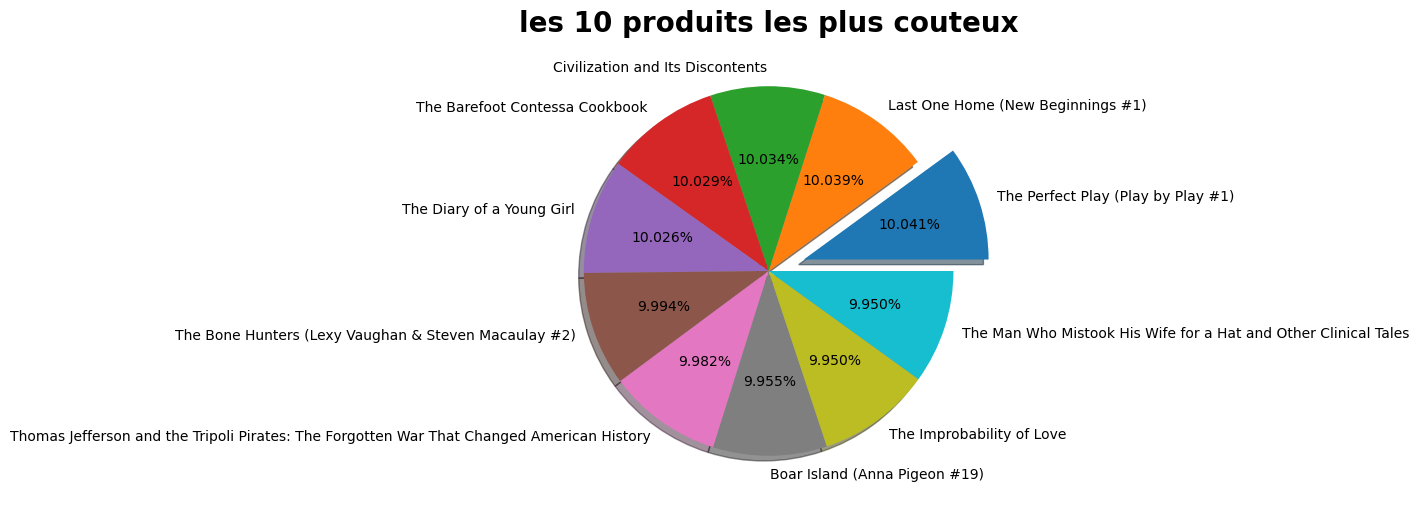

In [15]:
prod_label = top_prod_cout['product_name']
prod_price = top_prod_cout['price_TTC']

plt.figure(figsize = (10,6))
plt.pie(prod_price,labels=prod_label, autopct="%1.3f%%",explode=(0.2,0,0,0,0,0,0,0,0,0),shadow =True)

plt.title("les 10 produits les plus couteux", size = 20, weight='bold')
plt.show()

#### les 10 produits les moins couteux

In [16]:
top_prod = data.sort_values(by='price_TTC', ascending = True)

In [17]:
top_prod_bas = top_prod.head(10)
top_prod_bas

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
768,An Abundance of Katherines,10.00,10.00,0,5,5,Young Adult
803,The Origin of Species,10.01,10.01,0,7,4,Science
637,The Tipping Point: How Little Things Can Make ...,10.02,10.02,0,3,2,Add a comment
83,Patience,10.16,10.16,0,16,3,Sequential Art
531,Greek Mythic History,10.23,10.23,0,14,5,Default
494,The Fellowship of the Ring (The Lord of the Ri...,10.27,10.27,0,6,2,Default
832,History of Beauty,10.29,10.29,0,8,4,Art
846,The Lucifer Effect: Understanding How Good Peo...,10.40,10.40,0,14,1,Psychology
515,"NaNo What Now? Finding your editing process, r...",10.41,10.41,0,9,4,Default
882,Pet Sematary,10.56,10.56,0,14,3,Horror


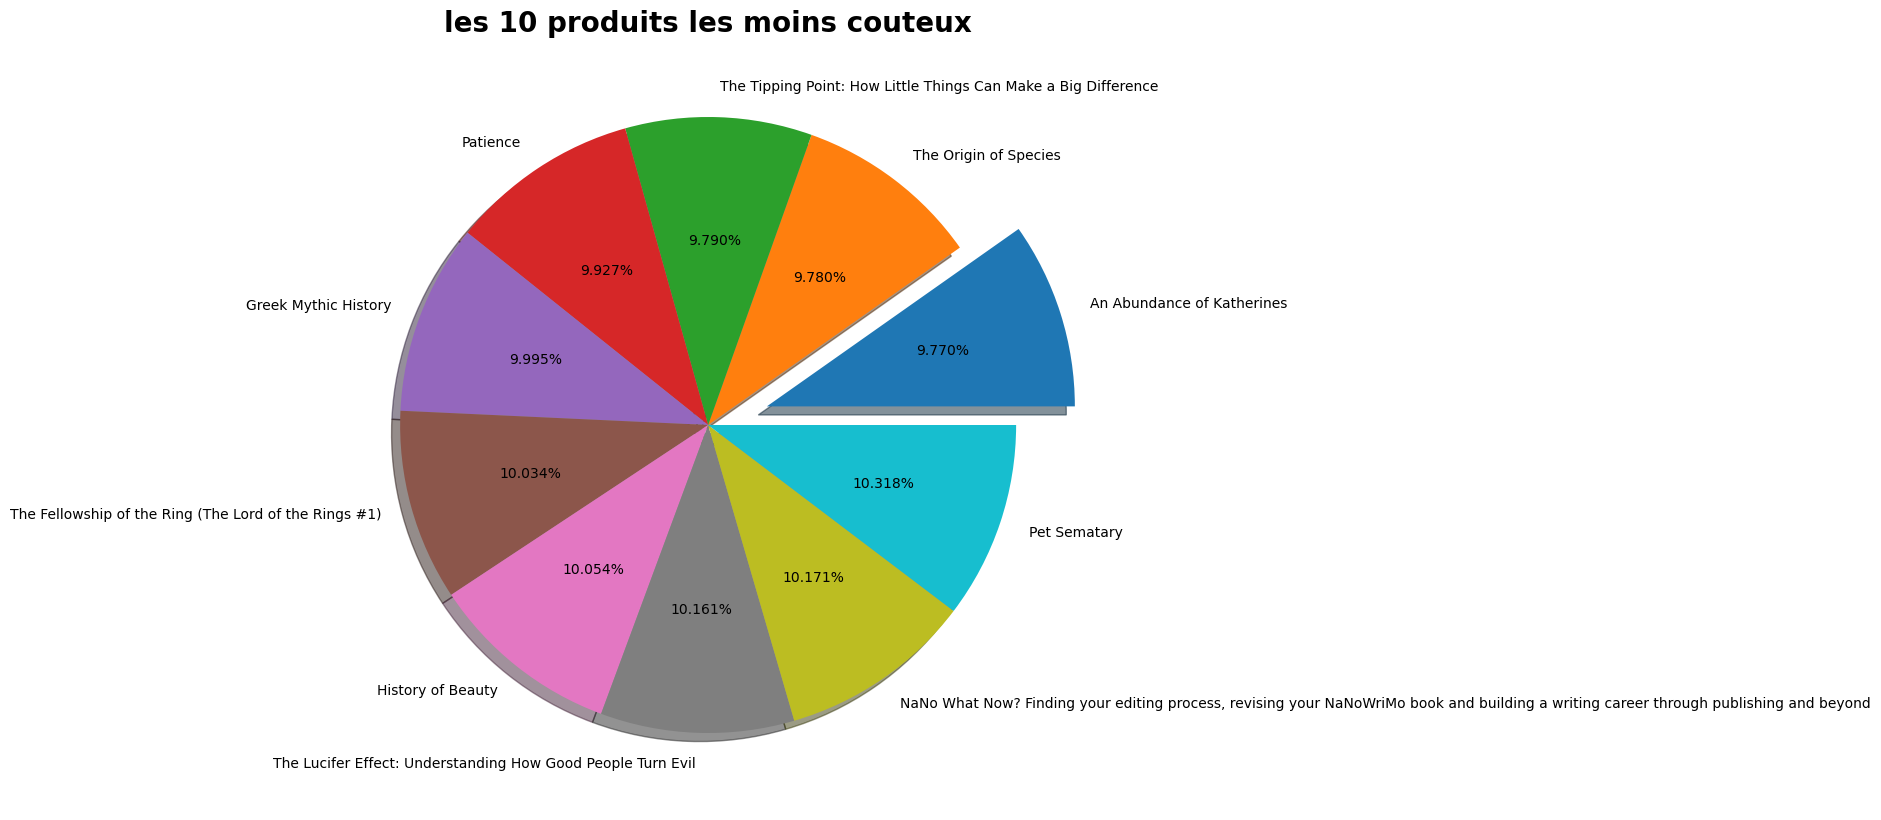

In [18]:
colors = ['red', 'lightgreen', 'blue', 'gold', 'cyan',
          'gray', 'black', 'salmon', 'brown', 'green']
prod_label = top_prod_bas['product_name']
prod_price = top_prod_bas['price_TTC']

plt.figure(figsize = (10,10))
plt.pie(prod_price,labels=prod_label, autopct="%1.3f%%",explode=(0.2,0,0,0,0,0,0,0,0,0),shadow =True)

plt.title("les 10 produits les moins couteux", size = 20, weight='bold')
plt.show()
plt.show()

## Les 10 produits les plus recommandés

In [19]:
prod_recom = data.sort_values(by='rating',ascending = False ).head(10)
prod_recom

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
768,An Abundance of Katherines,10.00,10.00,0,5,5,Young Adult
324,God: The Most Unpleasant Character in All Fiction,30.03,30.03,0,14,5,Religion
359,Brave Enough,51.32,51.32,0,3,5,Nonfiction
817,Leave This Song Behind: Teen Poetry at Its Best,51.17,51.17,0,7,5,Poetry
822,Les Fleurs du Mal,29.04,29.04,0,8,5,Poetry
339,Looking for Lovely: Collecting the Moments tha...,29.14,29.14,0,14,5,Nonfiction
419,Call the Nurse: True Stories of a Country Nurs...,29.14,29.14,0,16,5,Nonfiction
539,The Hunger Games (The Hunger Games #1),29.85,29.85,0,4,5,Default
812,"Quarter Life Poetry: Poems for the Young, Brok...",50.89,50.89,0,14,5,Poetry
983,All the Light We Cannot See,29.87,29.87,0,14,5,Historical


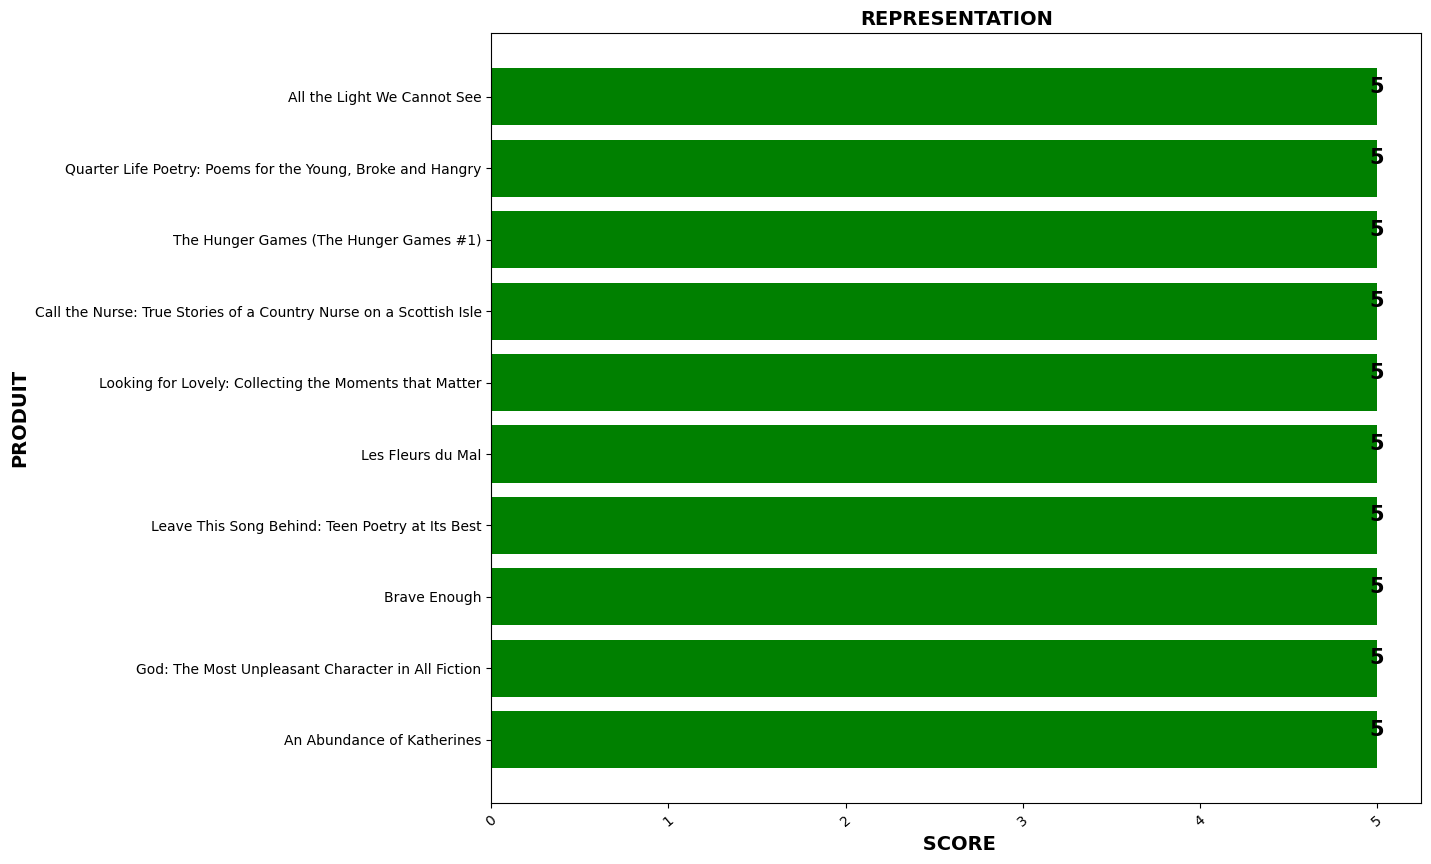

In [34]:

vente = prod_recom["rating"].tolist()
mois = prod_recom["product_name"]

#Creer le graphique en barres verticales
plt.figure(figsize = (12,10))
plt.barh(mois,vente, color='green')


# Affichage des valeurs dans chaque barre
for i, revenu in enumerate(vente):
    plt.text( revenu, i, str(revenu), ha='center', va='bottom',weight='bold', size = 15,color='black')

# Titres et labels des axes
plt.title('REPRESENTATION',size = 14, weight='bold')
plt.xlabel(' SCORE',size = 14, weight='bold')
plt.ylabel('PRODUIT',size = 14, weight='bold')
plt.xticks(rotation=40)

# Affichage du graphique
plt.show()

## Les 10 produits les moins recommandés

In [35]:
prod_recom = data.sort_values(by='rating',ascending = True ).head(10)
prod_recom

,product_name,price_HT,price_TTC,tax(%),stock,rating,category_name
869,The Loney,23.40,23.40,0,14,1,Horror
618,Sugar Rush (Offensive Line #2),24.42,24.42,0,2,1,Sports and Games
186,The Wedding Dress,24.12,24.12,0,15,1,Romance
967,We Are All Completely Beside Ourselves,24.04,24.04,0,3,1,Contemporary
977,How to Be Miserable: 40 Strategies You Already...,46.03,46.03,0,16,1,Self Help
815,Olio,23.88,23.88,0,19,1,Poetry
660,Sarah's Key,46.29,46.29,0,3,1,Add a comment
979,Online Marketing for Busy Authors: A Step-By-S...,46.35,46.35,0,16,1,Self Help
920,The Smitten Kitchen Cookbook,23.59,23.59,0,3,1,Food and Drink
519,Musicophilia: Tales of Music and the Brain,46.58,46.58,0,6,1,Default


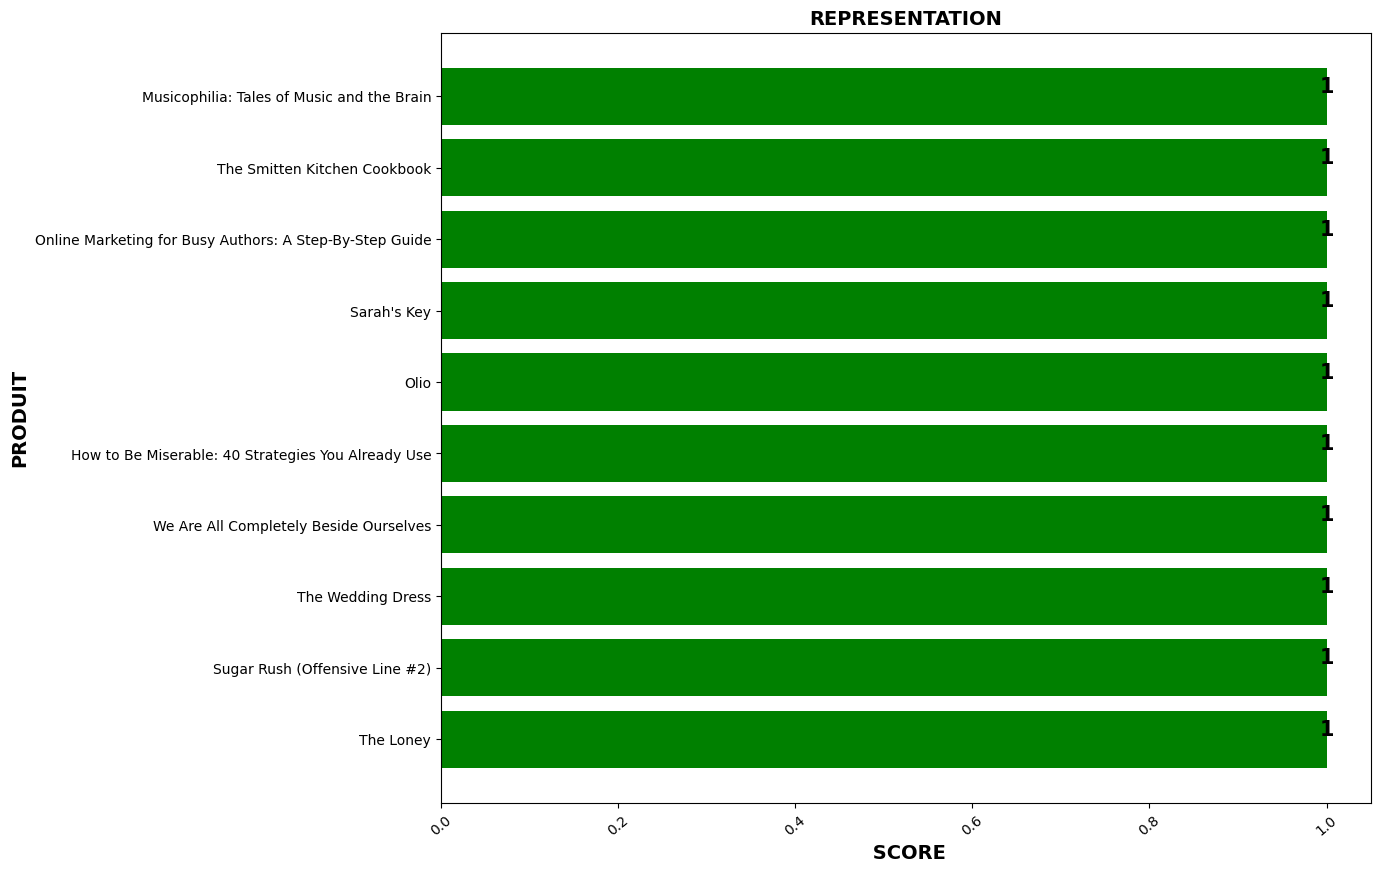

In [36]:
vente = prod_recom["rating"].tolist()
mois = prod_recom["product_name"]

#Creer le graphique en barres verticales
plt.figure(figsize = (12,10))
plt.barh(mois,vente, color='green')


# Affichage des valeurs dans chaque barre
for i, revenu in enumerate(vente):
    plt.text( revenu, i, str(revenu), ha='center', va='bottom',weight='bold', size = 15,color='black')

# Titres et labels des axes
plt.title('REPRESENTATION',size = 14, weight='bold')
plt.xlabel(' SCORE',size = 14, weight='bold')
plt.ylabel('PRODUIT',size = 14, weight='bold')
plt.xticks(rotation=40)

# Affichage du graphique
plt.show()

## les 5 categories ayant le plus de produits en stock

In [38]:
stock_by_category = data.groupby('category_name')['stock'].sum().sort_values(ascending=False)
top_5_cat = stock_by_category.head(5)
top_5_cat

category_name
Default           1345
Nonfiction         975
Sequential Art     686
Fiction            588
Add a comment      516
Name: stock, dtype: int64

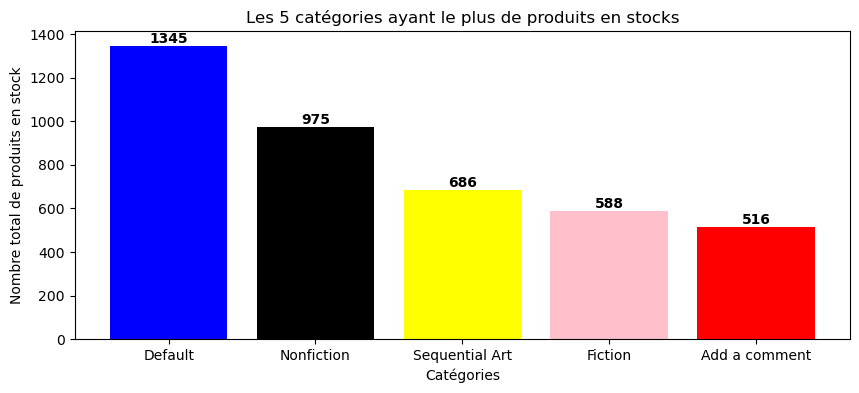

In [39]:


plt.figure(figsize=(10, 4))
colors= ['blue','black','yellow','pink','red']
plt.bar(top_5_cat.index, top_5_cat.values, color=colors)
plt.ylabel('Nombre total de produits en stock')
plt.xlabel('Catégories')

# Affichage des valeurs dans chaque barre
for i, index in enumerate(top_5_cat):
    plt.text(i, index, str(index), ha='center', va='bottom',weight='bold', size = 10)

plt.title('Les 5 catégories ayant le plus de produits en stocks')
  # Inverser l'axe y pour afficher la catégorie avec le plus de produits en haut
plt.show()

## les trois catégories ayant les produits les plus couteux

In [38]:
# data
top_3_categories = data.groupby("category_name")['price_TTC'].mean().sort_values(ascending=False).head(3)
top_3_categories


category_name
Suspense    58.330000
Novels      54.810000
Politics    53.613333
Name: price_TTC, dtype: float64

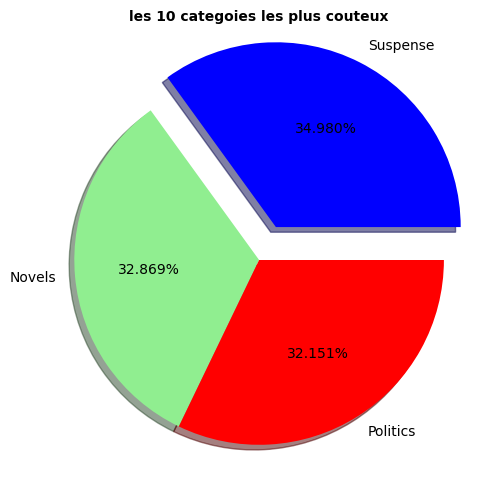

In [39]:
colors = ['blue', 'lightgreen', 'red']

plt.figure(figsize = (10,6))
plt.pie(top_3_categories, labels=top_3_categories.index, autopct="%1.3f%%",explode=(0.2,0,0),shadow =True,colors=colors)

plt.title("les trois catégories ayant les produits les plus couteux", size = 10, weight='bold')
plt.show()
plt.show()